## Prérequis

## Pré-Requis

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


## Partie 1 Analyse exploratoire

## Résultat attendu  

### Le notebook template avec la partie "Analyse exploratoire” complétée.

#### Import des datas

In [179]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

#### Visualisation des datas

In [180]:
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


## A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

#### Informations

In [181]:
display(building_consumption.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

None

On supprime les colonnes inutiles

In [182]:
print("Valeurs uniques dans DataYear :", building_consumption["DataYear"].unique())
building_consumption = building_consumption.drop(columns=["DataYear"])


Valeurs uniques dans DataYear : [2016]


In [183]:
building_consumption = building_consumption.drop(columns=["City","State"])

#### Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas

In [184]:
print("\nProportion de valeurs manquantes par colonne (%):")
print(((len(building_consumption) - building_consumption.apply(lambda s: s.value_counts().sum())) / len(building_consumption) * 100).sort_values(ascending=False))


Proportion de valeurs manquantes par colonne (%):
Comments                           100.000000
Outlier                             99.052133
YearsENERGYSTARCertified            96.475118
ThirdLargestPropertyUseType         82.345972
ThirdLargestPropertyUseTypeGFA      82.345972
SecondLargestPropertyUseTypeGFA     50.266588
SecondLargestPropertyUseType        50.266588
ENERGYSTARScore                     24.970379
LargestPropertyUseTypeGFA            0.592417
LargestPropertyUseType               0.592417
ZipCode                              0.473934
SteamUse(kBtu)                       0.266588
SourceEUIWN(kBtu/sf)                 0.266588
SourceEUI(kBtu/sf)                   0.266588
Electricity(kBtu)                    0.266588
NaturalGas(therms)                   0.266588
NaturalGas(kBtu)                     0.266588
TotalGHGEmissions                    0.266588
Electricity(kWh)                     0.266588
GHGEmissionsIntensity                0.266588
ListOfAllPropertyUseTypes    

Supprimer les non residentiels

In [185]:
print(sorted(building_consumption["PrimaryPropertyType"].dropna().unique()))

['Distribution Center', 'High-Rise Multifamily', 'Hospital', 'Hotel', 'K-12 School', 'Laboratory', 'Large Office', 'Low-Rise Multifamily', 'Medical Office', 'Mid-Rise Multifamily', 'Mixed Use Property', 'Office', 'Other', 'Refrigerated Warehouse', 'Residence Hall', 'Restaurant', 'Retail Store', 'Self-Storage Facility', 'Senior Care Community', 'Small- and Mid-Sized Office', 'Supermarket / Grocery Store', 'University', 'Warehouse', 'Worship Facility']


In [186]:
# Liste des types purement résidentiels à exclure
types_residentiels = [
    "High-Rise Multifamily",
    "Mid-Rise Multifamily",
    "Low-Rise Multifamily",
    "Residence Hall",
    "Senior Care Community"
]

# Suppression des lignes correspondantes
idx_res = building_consumption.index[building_consumption["PrimaryPropertyType"].isin(types_residentiels)]
building_consumption = building_consumption.drop(index=idx_res)

# Contrôle
print("Lignes restantes :", len(building_consumption))
print("Types restants :", building_consumption["PrimaryPropertyType"].value_counts().head(10))


Lignes restantes : 1652
Types restants : PrimaryPropertyType
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Name: count, dtype: int64


Suppresion des lignes considérées comme outliers

In [187]:
# Comptage avant
n_avant = len(building_consumption)

# Index des outliers marqués
idx_outliers = building_consumption.index[
    building_consumption["Outlier"].astype(str).str.contains("high outlier|low outlier", case=False, na=False)
]

# Option audit, conserver les lignes supprimées
df_outliers = building_consumption.loc[idx_outliers].copy()

# Suppression
building_consumption = building_consumption.drop(index=idx_outliers)

# Contrôle
print("Outliers supprimés :", len(idx_outliers), "; lignes restantes :", len(building_consumption), "; lignes avant :", n_avant)


Outliers supprimés : 16 ; lignes restantes : 1636 ; lignes avant : 1652


Suppression des colonnes très vides

In [188]:
to_drop = (building_consumption.isnull().mean() * 100 > 70).index[building_consumption.isnull().mean() * 100 > 70]
building_consumption = building_consumption.drop(columns=to_drop)
display(building_consumption.head())

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,...,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,...,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88


In [189]:
print("Colonnes supprimées car > 80 % de NaN :", to_drop)

Colonnes supprimées car > 80 % de NaN : Index(['ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'Comments', 'Outlier'],
      dtype='object')


#### Suppression des colonnes avec des données non structurelles des bâtiments ou redondantes (taille et usage des bâtiments, date de construction, situation géographique, ...)

In [190]:
building_consumption.drop(columns=[
    'ENERGYSTARScore',
    'ComplianceStatus', 
    'DefaultData', 
    'OSEBuildingID', 
    'PropertyName', 
    'TaxParcelIdentificationNumber', 
    'SteamUse(kBtu)', 
    'Electricity(kBtu)', 
    'Electricity(kWh)', 
    'NaturalGas(therms)', 
    'NaturalGas(kBtu)', 
    'SiteEUI(kBtu/sf)', 
    'SiteEUIWN(kBtu/sf)', 
    'SourceEUI(kBtu/sf)', 
    'SourceEUIWN(kBtu/sf)', 
    'SiteEnergyUse(kBtu)', 
    'SiteEnergyUseWN(kBtu)',
    'PropertyGFATotal',
    'GHGEmissionsIntensity',
    'ListOfAllPropertyUseTypes'
], inplace=True)


#### Préparation à une matrice de corrélation

In [191]:
building_consumption["CouncilDistrictCode"] = building_consumption["CouncilDistrictCode"].astype("string")
building_consumption["ZipCode"] = building_consumption["ZipCode"].astype("Int64").astype("string")


In [192]:
colonnes_autorisees = [
    "Latitude",
    "Longitude",
    "YearBuilt",
    "NumberofBuildings", 
    "NumberofFloors", 
    "PropertyGFAParking", 
    "PropertyGFABuilding(s)",
    "LargestPropertyUseTypeGFA", 
    "SecondLargestPropertyUseTypeGFA", 
    "ThirdLargestPropertyUseTypeGFA",
    "TotalGHGEmissions",
]

cols = [c for c in colonnes_autorisees if c in building_consumption.columns]
cols = [c for c in cols if building_consumption[c].dtype.kind in "if" and building_consumption[c].nunique(dropna=True) > 1]
corr = building_consumption[cols].corr(method="pearson").round(2)
print("Colonnes utilisées pour la corrélation :", cols)
display(corr)


Colonnes utilisées pour la corrélation : ['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'TotalGHGEmissions']


,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,TotalGHGEmissions
Latitude,1.00,-0.10,0.06,0.02,-0.01,0.04,0.00,0.01,-0.01,0.00
Longitude,-0.10,1.00,0.01,0.02,-0.01,-0.02,0.03,0.03,0.01,0.04
YearBuilt,0.06,0.01,1.00,-0.03,0.10,0.28,0.07,0.07,0.26,0.05
NumberofBuildings,0.02,0.02,-0.03,1.00,-0.02,-0.01,0.77,0.80,0.15,0.42
NumberofFloors,-0.01,-0.01,0.10,-0.02,1.00,0.51,0.35,0.33,0.49,0.13
PropertyGFAParking,0.04,-0.02,0.28,-0.01,0.51,1.00,0.25,0.28,0.46,0.06
PropertyGFABuilding(s),0.00,0.03,0.07,0.77,0.35,0.25,1.00,0.98,0.79,0.54
LargestPropertyUseTypeGFA,0.01,0.03,0.07,0.80,0.33,0.28,0.98,1.00,0.76,0.57
SecondLargestPropertyUseTypeGFA,-0.01,0.01,0.26,0.15,0.49,0.46,0.79,0.76,1.00,0.51
TotalGHGEmissions,0.00,0.04,0.05,0.42,0.13,0.06,0.54,0.57,0.51,1.00


 * Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 


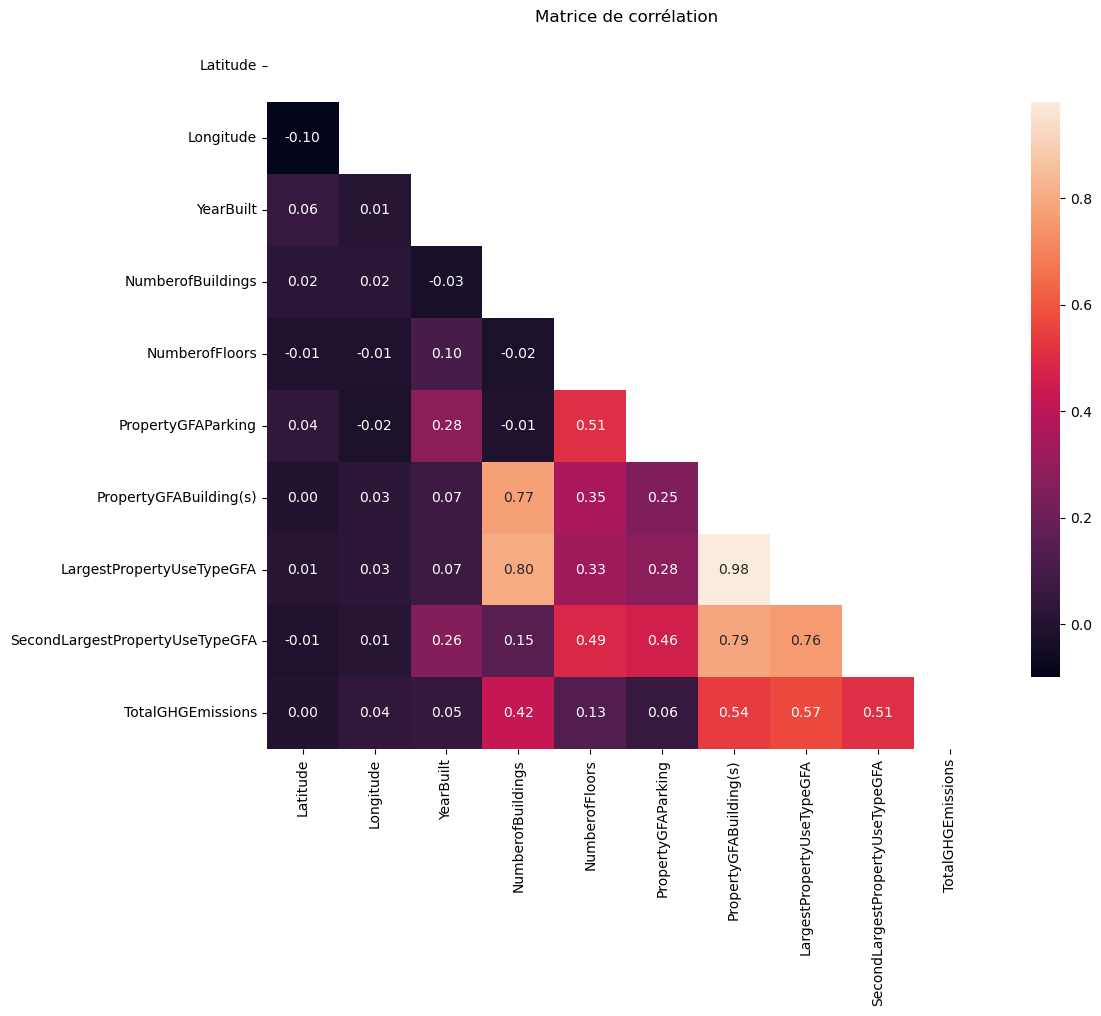

In [193]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

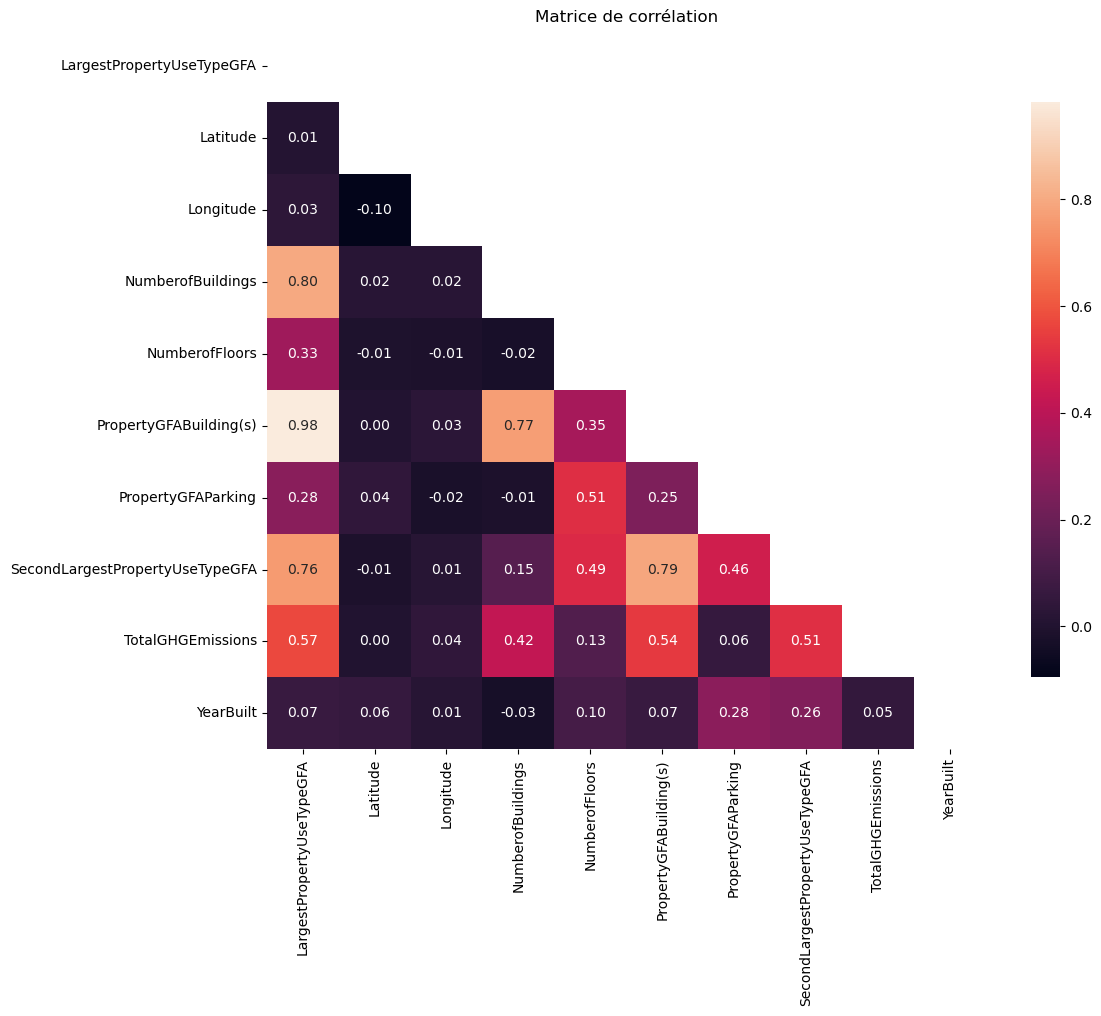

In [194]:
# Colonnes numériques pertinentes
cols_num = building_consumption.select_dtypes(include="number").columns.difference(
    ["OSEBuildingID", "ZipCode", "CouncilDistrictCode"]
)
cols_num = [c for c in cols_num if building_consumption[c].nunique(dropna=True) > 1]

# Matrice et heatmap
corr = building_consumption[cols_num].corr(method="pearson")
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()


Il en reste des corrélés mais ils restent tout de même interessants

### On continue le nettoyage et description

In [195]:
colonnes_a_decrire = [
    "YearBuilt",
    "NumberofBuildings", "NumberofFloors",
    "PropertyGFABuilding(s)", "PropertyGFAParking",
    "ENERGYSTARScore",
    "TotalGHGEmissions"
]

colonnes_a_decrire = [c for c in colonnes_a_decrire if c in building_consumption.columns]

table_statistiques = building_consumption[colonnes_a_decrire].describe(
    percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]
).T
table_statistiques["taux_manquants_%"] = building_consumption[colonnes_a_decrire].isna().mean().mul(100).round(1)
table_statistiques


,count,mean,std,min,10%,25%,50%,75%,90%,max,taux_manquants_%
YearBuilt,1636.0,1962.248778,32.776938,1900.0,1912.000,1930.000,1966.000,1990.000,2004.000,2015.00,0.0
NumberofBuildings,1634.0,1.171359,2.959206,0.0,1.000,1.000,1.000,1.000,1.000,111.00,0.1
NumberofFloors,1636.0,4.162592,6.635589,0.0,1.000,1.000,2.000,4.000,7.000,99.00,0.0
PropertyGFABuilding(s),1636.0,106970.861247,286711.086703,10925.0,22515.500,28542.250,47316.500,95444.750,215699.500,9320156.00,0.0
PropertyGFAParking,1636.0,13191.328240,42789.493013,0.0,0.000,0.000,0.000,0.000,35332.500,512608.00,0.0
TotalGHGEmissions,1634.0,185.029376,759.693231,-0.8,7.705,20.085,49.215,135.665,336.824,16870.98,0.1


#### Distributions principales, histogrammes

* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.

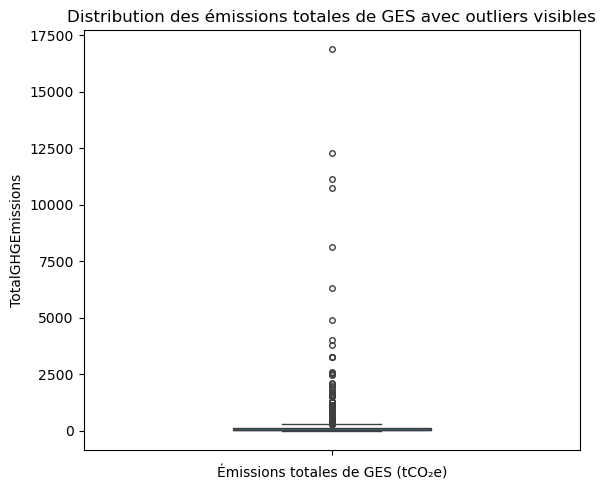

In [196]:
plt.figure(figsize=(6,5))
sns.boxplot(y=building_consumption["TotalGHGEmissions"], width=0.4, fliersize=4)
plt.xlabel("Émissions totales de GES (tCO₂e)")
plt.title("Distribution des émissions totales de GES avec outliers visibles")
plt.tight_layout()
plt.show()


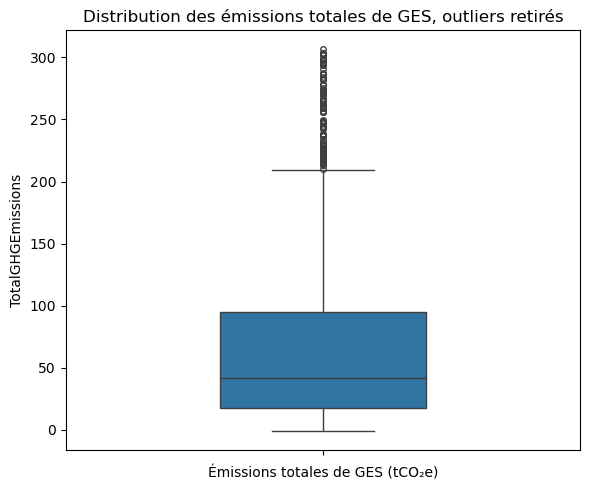

In [197]:
# Suppression des valeurs aberrantes sur TotalGHGEmissions par méthode IQR
q1 = building_consumption["TotalGHGEmissions"].quantile(0.25)
q3 = building_consumption["TotalGHGEmissions"].quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
building_consumption = building_consumption[building_consumption["TotalGHGEmissions"].between(lb, ub)]

# Boxplot après nettoyage
plt.figure(figsize=(6,5))
sns.boxplot(y=building_consumption["TotalGHGEmissions"], width=0.4, fliersize=4)
plt.xlabel("Émissions totales de GES (tCO₂e)")
plt.title("Distribution des émissions totales de GES, outliers retirés")
plt.tight_layout()
plt.show()


* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).


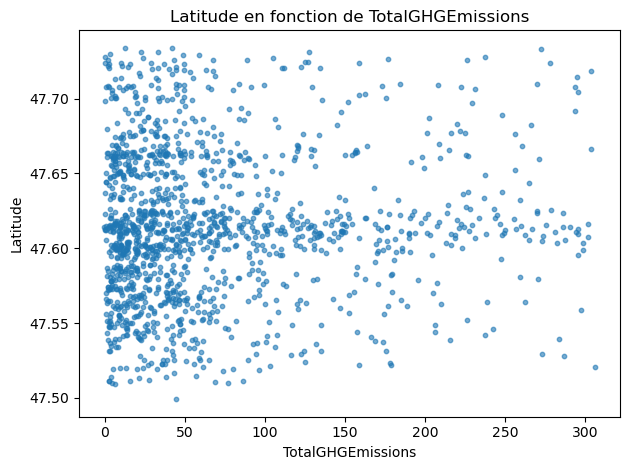

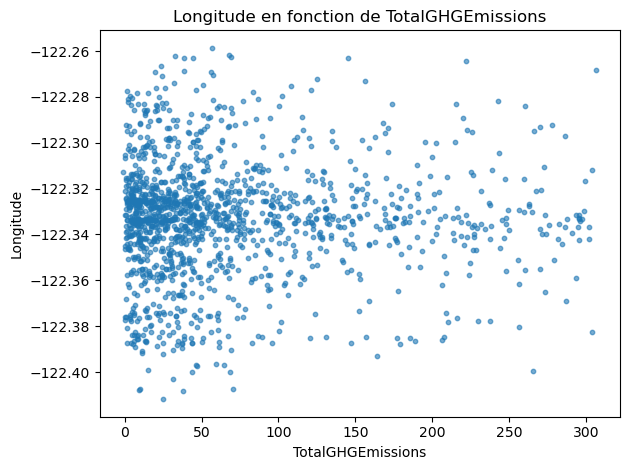

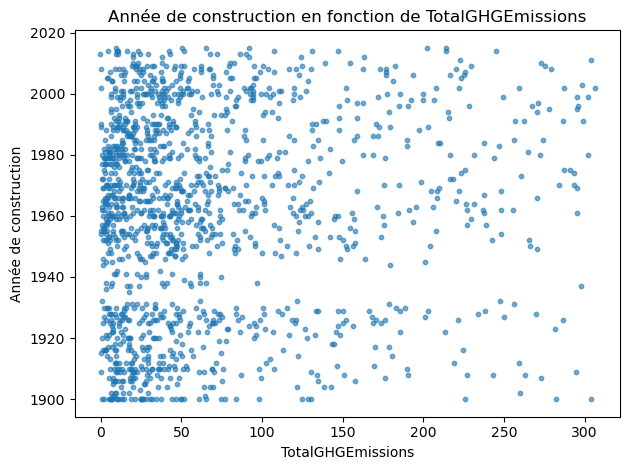

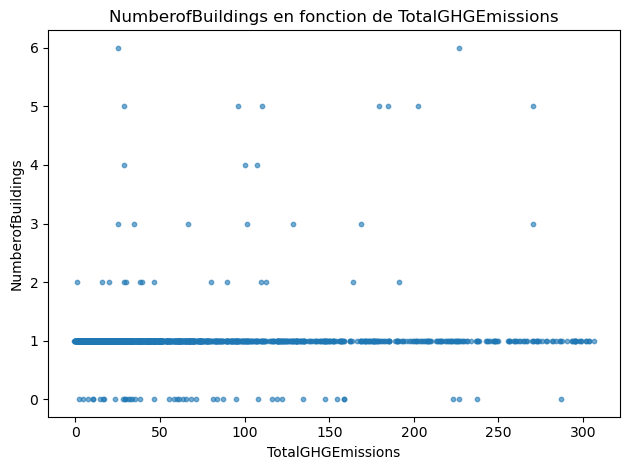

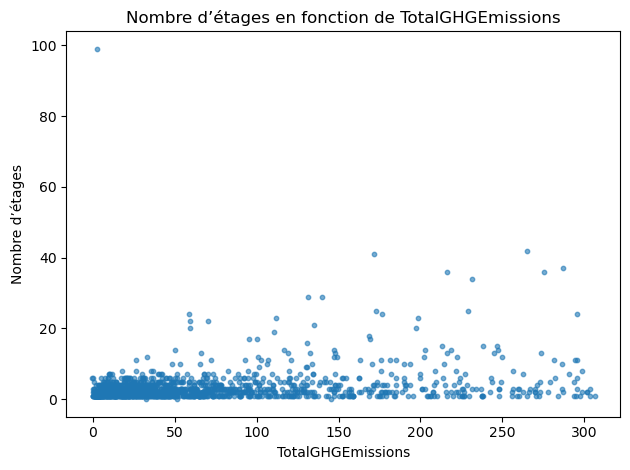

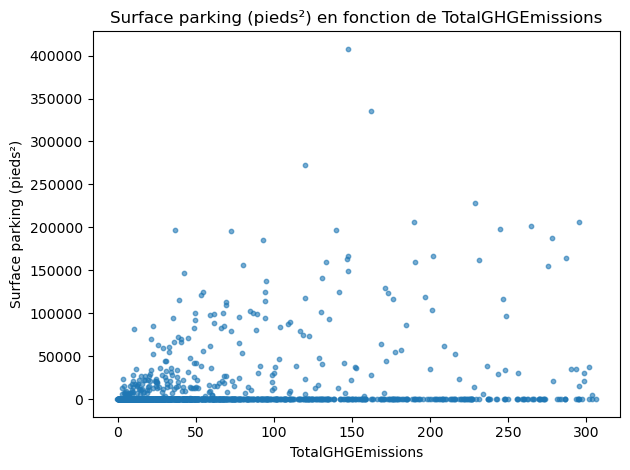

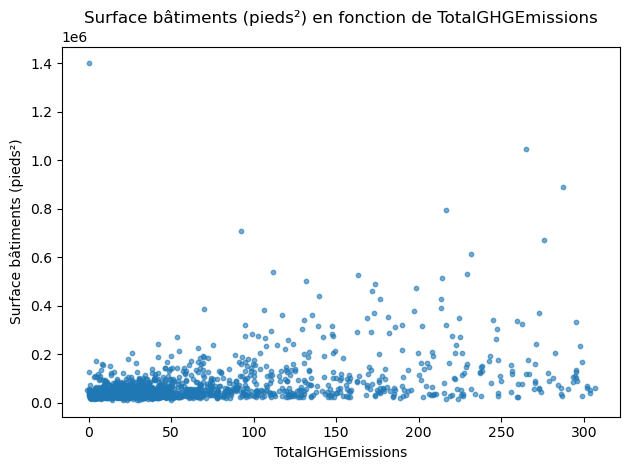

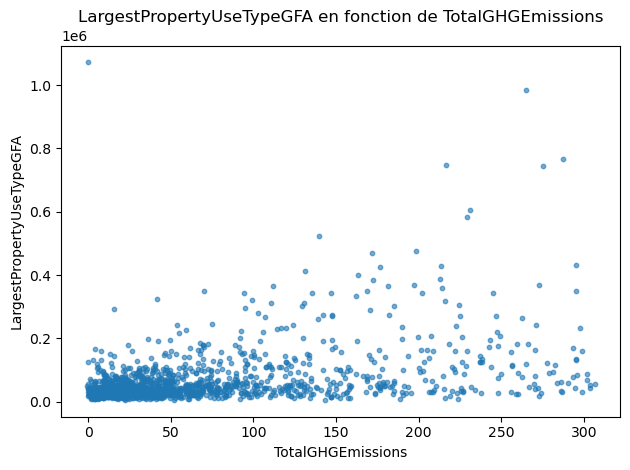

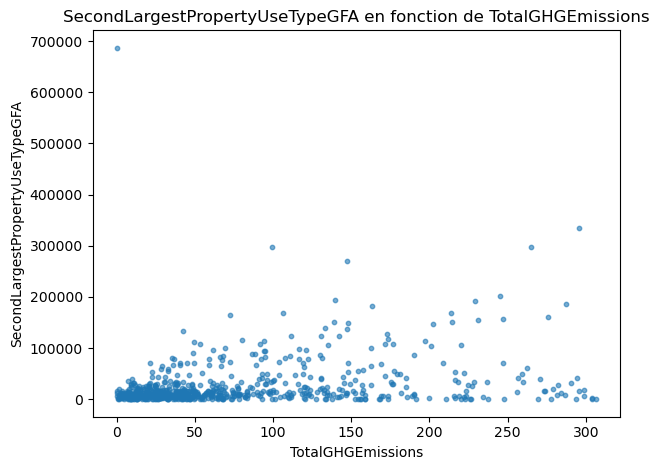

In [198]:
# Abscisse fixée
abscisse = "TotalGHGEmissions"

# Candidats automatiques en ordonnée, numériques, hors identifiants et abscisse
exclusions = {"OSEBuildingID", "ZipCode", "CouncilDistrictCode", abscisse}
candidats = [
    c for c in building_consumption.select_dtypes(include="number").columns
    if c not in exclusions and building_consumption[c].nunique(dropna=True) > 1
]

# Libellés en français
libelles = {
    "PropertyGFATotal": "Surface totale (pieds²)",
    "PropertyGFABuilding(s)": "Surface bâtiments (pieds²)",
    "PropertyGFAParking": "Surface parking (pieds²)",
    "NumberofFloors": "Nombre d’étages",
    "YearBuilt": "Année de construction",
    
}

# Tracé, une figure par candidat
assert abscisse in building_consumption.columns, f"Abscisse absente: {abscisse}"
for y in candidats:
    data_xy = building_consumption[[abscisse, y]].dropna()
    if data_xy.empty:
        continue
    plt.figure()
    plt.scatter(data_xy[abscisse], data_xy[y], s=10, alpha=0.6)
    plt.xlabel(libelles.get(abscisse, abscisse))
    plt.ylabel(libelles.get(y, y))
    plt.title(f"{libelles.get(y, y)} en fonction de {libelles.get(abscisse, abscisse)}")
    plt.tight_layout()
    plt.show()




In [199]:
print(building_consumption.columns.tolist())

['BuildingType', 'PrimaryPropertyType', 'Address', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'TotalGHGEmissions']


*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target). 

In [200]:
cible = "TotalGHGEmissions"

colonnes_a_exclure = ['Address',cible]

X = building_consumption.drop(columns=[c for c in colonnes_a_exclure if c in building_consumption.columns])
y = building_consumption[cible]

display(X.head())
print(X.info())


,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA
0,NonResidential,Hotel,98101,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,0,88434,Hotel,88434.0,NaN,NaN
1,NonResidential,Hotel,98101,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,15064,88502,Hotel,83880.0,Parking,15064.0
3,NonResidential,Hotel,98101,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,0,61320,Hotel,61320.0,NaN,NaN
5,Nonresidential COS,Other,98101,7,DOWNTOWN,47.61623,-122.33657,1999,1.0,2,37198,60090,Police Station,88830.0,NaN,NaN
6,NonResidential,Hotel,98101,7,DOWNTOWN,47.61390,-122.33283,1926,1.0,11,0,83008,Hotel,81352.0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 3375
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1451 non-null   object 
 1   PrimaryPropertyType              1451 non-null   object 
 2   ZipCode                          1435 non-null   string 
 3   CouncilDistrictCode              1451 non-null   string 
 4   Neighborhood                     1451 non-null   object 
 5   Latitude                         1451 non-null   float64
 6   Longitude                        1451 non-null   float64
 7   YearBuilt                        1451 non-null   int64  
 8   NumberofBuildings                1451 non-null   float64
 9   NumberofFloors                   1451 non-null   int64  
 10  PropertyGFAParking               1451 non-null   int64  
 11  PropertyGFABuilding(s)           1451 non-null   int64  
 12  LargestPropertyUseType   

* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

In [201]:

na = X.isna().sum().sort_values(ascending=False)
print(na[na>0])


SecondLargestPropertyUseType       717
SecondLargestPropertyUseTypeGFA    717
ZipCode                             16
LargestPropertyUseType               4
LargestPropertyUseTypeGFA            4
dtype: int64


On corrigfe les Nan

In [202]:
# Catégorie manquante = "None"
X["SecondLargestPropertyUseType"] = X["SecondLargestPropertyUseType"].fillna("None")

# Surface manquante = 0
X["SecondLargestPropertyUseTypeGFA"] = X["SecondLargestPropertyUseTypeGFA"].fillna(0)


In [203]:
na = X.isna().sum().sort_values(ascending=False)
print(na[na>0])

ZipCode                      16
LargestPropertyUseType        4
LargestPropertyUseTypeGFA     4
dtype: int64


In [204]:
# Remplissage ciblé des 16 ZipCode manquants par index, avec contrôle des non appliqués
fixes = {
    3360: "98125",
    3363: "98125",
    3362: "98117",
    3365: "98117",
    3364: "98107",
    3366: "98119",
    3373: "98119",
    3367: "98112",
    3368: "98122",
    3361: "98144",
    3372: "98104",
    3371: "98108",
    3369: "98118",
    3370: "98126",
    3374: "98108",
    3375: "98108",
}

maj = 0
non_applique = [] 

for i, z in fixes.items():
    if i not in X.index:
        non_applique.append((i, "index absent"))
        continue
    v = X.at[i, "ZipCode"]
    if pd.isna(v) or str(v).strip() == "":
        X.at[i, "ZipCode"] = z
        maj += 1
    else:
        non_applique.append((i, "déjà renseigné"))

print(f"Mises à jour appliquées: {maj}")
if non_applique:
    lst = ", ".join([f"{i} ({r})" for i, r in non_applique])
    print(f"Non appliquées: {len(non_applique)} éléments, détails: {lst}")
else:
    print("Tous les changements de la liste ont été appliqués")


Mises à jour appliquées: 16
Tous les changements de la liste ont été appliqués


In [205]:
na = X.isna().sum().sort_values(ascending=False)
print(na[na>0])

LargestPropertyUseType       4
LargestPropertyUseTypeGFA    4
dtype: int64


In [206]:
mask = X["LargestPropertyUseType"].notna()
X = X.loc[mask].copy()
y = y.loc[X.index]


In [207]:
# CSV
X.to_csv("X_export.csv", index=False)
print("Écrit X_export.csv")


Écrit X_export.csv


OneHotEncoder méthode

In [209]:
# Colonnes catégorielles explicites
cols_cat = [
    "BuildingType",
    "PrimaryPropertyType",
    "LargestPropertyUseType",
    "ZipCode", 
    "CouncilDistrictCode",
    "SecondLargestPropertyUseType",
    "Neighborhood"
    
]

# On encode uniquement ces colonnes-là
X_OHE = pd.get_dummies(X, columns=cols_cat, drop_first=False)

print("Forme finale de X_OHE :", X_OHE.shape)
display(X_OHE.head())



Forme finale de X_OHE : (1447, 207)


,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,BuildingType_Campus,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,47.61220,-122.33799,1927,1.0,12,0,88434,88434.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
1,47.61317,-122.33393,1996,1.0,11,15064,88502,83880.0,15064.0,False,...,False,False,False,False,False,False,False,False,False,False
3,47.61412,-122.33664,1926,1.0,10,0,61320,61320.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
5,47.61623,-122.33657,1999,1.0,2,37198,60090,88830.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
6,47.61390,-122.33283,1926,1.0,11,0,83008,81352.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False


LabelEncoder

In [210]:
# Méthode 2, Label Encoding sur toutes les catégorielles
X_LE = X.copy()
for c in cols_cat:
    X_LE[c] = LabelEncoder().fit_transform(X_LE[c].astype(str))


## Comparaison de différents modèles supervisés

### A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [218]:
# --- Modèle 1 : DummyRegressor ---
# Copies dédiées
X_dummy = X_OHE.copy()
y_dummy = y.copy()

# Séparation apprentissage test
Xtr, Xte, ytr, yte = train_test_split(X_dummy, y_dummy, test_size=0.2, random_state=42)

# Validation croisée sur le jeu d’apprentissage
scoring = {"r2":"r2", "mae":"neg_mean_absolute_error", "rmse":"neg_root_mean_squared_error"}
cv_res = cross_validate(DummyRegressor(strategy="median"), Xtr, ytr, cv=5, scoring=scoring, return_train_score=False)

cv_r2   = cv_res["test_r2"].mean()
cv_mae  = -cv_res["test_mae"].mean()
cv_rmse = -cv_res["test_rmse"].mean()

# Entraînement sur tout le train
dum = DummyRegressor(strategy="median")
dum.fit(Xtr, ytr)

# Inférence
yp_tr = dum.predict(Xtr)
yp_te = dum.predict(Xte)

# Métriques apprentissage
r2_tr   = r2_score(ytr, yp_tr)
mae_tr  = mean_absolute_error(ytr, yp_tr)
rmse_tr = root_mean_squared_error(ytr, yp_tr)

# Métriques test
r2_te   = r2_score(yte, yp_te)
mae_te  = mean_absolute_error(yte, yp_te)
rmse_te = root_mean_squared_error(yte, yp_te)

print(f"Dummy, CV R2 moyen {cv_r2:.3f}, CV MAE moyen {cv_mae:.2f}, CV RMSE moyen {cv_rmse:.2f}")
print(f"Dummy, Train  R2 {r2_tr:.3f}, MAE {mae_tr:.2f}, RMSE {rmse_tr:.2f}")
print(f"Dummy, Test   R2 {r2_te:.3f}, MAE {mae_te:.2f}, RMSE {rmse_te:.2f}")


Dummy, CV R2 moyen -0.138, CV MAE moyen 49.31, CV RMSE moyen 74.52
Dummy, Train  R2 -0.138, MAE 49.29, RMSE 74.76
Dummy, Test   R2 -0.122, MAE 49.67, RMSE 76.77


In [219]:
# --- Modèle 2 : Régression linéaire avec scaling ---

# Copies dédiées
X_lin = X_OHE.copy()
y_lin = y.copy()

# Séparation apprentissage et test
Xtr, Xte, ytr, yte = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

# Petit estimateur enveloppe, scaling puis modèle
class ScaleRegressor:
    def __init__(self, model):
        self.model = model
        self.scaler = StandardScaler()
        self.cols_ = None
    def fit(self, X_fit, y_fit):
        self.cols_ = X_fit.columns
        Xs = self.scaler.fit_transform(X_fit)
        self.model.fit(Xs, y_fit)
        return self
    def predict(self, X_new):
        Xs = self.scaler.transform(X_new[self.cols_])
        return self.model.predict(Xs)
    def get_params(self, deep=True):
        return {"model": self.model}
    def set_params(self, **params):
        for k,v in params.items(): setattr(self, k, v)
        return self

est = ScaleRegressor(LinearRegression())

# Validation croisée sur le jeu d’apprentissage
scoring = {"r2":"r2", "mae":"neg_mean_absolute_error", "rmse":"neg_root_mean_squared_error"}
cv_res = cross_validate(est, Xtr, ytr, cv=5, scoring=scoring, return_train_score=False)

cv_r2   = cv_res["test_r2"].mean()
cv_mae  = -cv_res["test_mae"].mean()
cv_rmse = -cv_res["test_rmse"].mean()

# Entraînement complet
est.fit(Xtr, ytr)

# Inférence
yp_tr = est.predict(Xtr)
yp_te = est.predict(Xte)

# Métriques
r2_tr   = r2_score(ytr, yp_tr);  mae_tr  = mean_absolute_error(ytr, yp_tr);  rmse_tr = root_mean_squared_error(ytr, yp_tr)
r2_te   = r2_score(yte, yp_te);  mae_te  = mean_absolute_error(yte, yp_te);  rmse_te = root_mean_squared_error(yte, yp_te)

print(f"LIN, CV R2 moyen {cv_r2:.3f}, CV MAE moyen {cv_mae:.2f}, CV RMSE moyen {cv_rmse:.2f}")
print(f"LIN, Train  R2 {r2_tr:.3f}, MAE {mae_tr:.2f}, RMSE {rmse_tr:.2f}")
print(f"LIN, Test   R2 {r2_te:.3f}, MAE {mae_te:.2f}, RMSE {rmse_te:.2f}")


LIN, CV R2 moyen -660811664133477045786116096.000, CV MAE moyen 155560638672452.38, CV RMSE moyen 1142742528167248.50
LIN, Train  R2 0.541, MAE 33.81, RMSE 47.47
LIN, Test   R2 -552567454559880468745945088.000, MAE 188989338425783.16, RMSE 1703444460244172.50


In [220]:
# --- Modèle 3 : SVR avec scaling ---

# Copies dédiées
X_svr = X_OHE.copy()
y_svr = y.copy()

# Séparation apprentissage et test
Xtr, Xte, ytr, yte = train_test_split(X_svr, y_svr, test_size=0.2, random_state=42)

# Estimateur: SVR dans ton wrapper de scaling
est = ScaleRegressor(SVR(kernel="rbf", C=10.0, epsilon=0.1, gamma="scale"))

# Validation croisée sur le jeu d’apprentissage
scoring = {"r2":"r2", "mae":"neg_mean_absolute_error", "rmse":"neg_root_mean_squared_error"}
cv_res = cross_validate(est, Xtr, ytr, cv=5, scoring=scoring, return_train_score=False)

cv_r2   = cv_res["test_r2"].mean()
cv_mae  = -cv_res["test_mae"].mean()
cv_rmse = -cv_res["test_rmse"].mean()

# Entraînement complet
est.fit(Xtr, ytr)

# Inférence
yp_tr = est.predict(Xtr)
yp_te = est.predict(Xte)

# Métriques
r2_tr   = r2_score(ytr, yp_tr);  mae_tr  = mean_absolute_error(ytr, yp_tr);  rmse_tr = root_mean_squared_error(ytr, yp_tr)
r2_te   = r2_score(yte, yp_te);  mae_te  = mean_absolute_error(yte, yp_te);  rmse_te = root_mean_squared_error(yte, yp_te)

print(f"SVR, CV R2 moyen {cv_r2:.3f}, CV MAE moyen {cv_mae:.2f}, CV RMSE moyen {cv_rmse:.2f}")
print(f"SVR, Train  R2 {r2_tr:.3f}, MAE {mae_tr:.2f}, RMSE {rmse_tr:.2f}")
print(f"SVR, Test   R2 {r2_te:.3f}, MAE {mae_te:.2f}, RMSE {rmse_te:.2f}")


SVR, CV R2 moyen 0.145, CV MAE moyen 42.46, CV RMSE moyen 64.60
SVR, Train  R2 0.245, MAE 37.92, RMSE 60.88
SVR, Test   R2 0.137, MAE 42.40, RMSE 67.33


In [221]:
# --- Modèle 4 : RandomForestRegressor ---

# Copies dédiées
X_rf = X_OHE.copy()
y_rf = y.copy()

# Séparation apprentissage et test
Xtr, Xte, ytr, yte = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Estimateur Forêt Aléatoire
est = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# Validation croisée sur le jeu d’apprentissage
scoring = {"r2":"r2", "mae":"neg_mean_absolute_error", "rmse":"neg_root_mean_squared_error"}
cv_res = cross_validate(est, Xtr, ytr, cv=5, scoring=scoring, return_train_score=False)

cv_r2   = cv_res["test_r2"].mean()
cv_mae  = -cv_res["test_mae"].mean()
cv_rmse = -cv_res["test_rmse"].mean()

# Entraînement complet
est.fit(Xtr, ytr)

# Inférence
yp_tr = est.predict(Xtr)
yp_te = est.predict(Xte)

# Métriques
r2_tr   = r2_score(ytr, yp_tr);  mae_tr  = mean_absolute_error(ytr, yp_tr);  rmse_tr = root_mean_squared_error(ytr, yp_tr)
r2_te   = r2_score(yte, yp_te);  mae_te  = mean_absolute_error(yte, yp_te);  rmse_te = root_mean_squared_error(yte, yp_te)

print(f"RF, CV R2 moyen {cv_r2:.3f}, CV MAE moyen {cv_mae:.2f}, CV RMSE moyen {cv_rmse:.2f}")
print(f"RF, Train  R2 {r2_tr:.3f}, MAE {mae_tr:.2f}, RMSE {rmse_tr:.2f}")
print(f"RF, Test   R2 {r2_te:.3f}, MAE {mae_te:.2f}, RMSE {rmse_te:.2f}")


RF, CV R2 moyen 0.390, CV MAE moyen 38.20, CV RMSE moyen 54.53
RF, Train  R2 0.915, MAE 14.07, RMSE 20.38
RF, Test   R2 0.319, MAE 40.17, RMSE 59.82
